# This project is based on video title and description classification using NLTK , Keras , Scikitlearn .  
## I used Chat Gpt to Write complex codes
### The Data Used in this project is Scraped by me using Data Miner tool

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
df = pd.read_csv('/content/Videos_data.csv', index_col=0)


In [3]:
df.head(5)

,Video Id,Title,Description,Category
0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,#NAME?,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10333 entries, 0 to 10332
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Video Id     10333 non-null  object
 1   Title        10333 non-null  object
 2   Description  9999 non-null   object
 3   Category     10333 non-null  object
dtypes: object(4)
memory usage: 403.6+ KB


In [5]:
df.isnull().sum()

Video Id         0
Title            0
Description    334
Category         0
dtype: int64

In [6]:
df['Category'].unique()

array(['travel', 'science and technology', 'food', 'manufacturing',
       'history', 'art and music'], dtype=object)

In [7]:
df['Description']

0        The journey to Arunachal, North East India beg...
1        SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...
2        I had the chance to fly out to Bali with my wh...
3        Hope you enjoy MY GOA TRAVEL DIARY this video!...
4        Travel blogger, Nikki Vargas, of The Pin the M...
                               ...                        
10328    Watercolor scenery painting demo - Rainy Day O...
10329    Music by Midwinter Minis. Enjoyed this series?...
10330    If you loved the video then please like share ...
10331    THE UPSIDE is director Neil Burger's heartfelt...
10332    Thanks to Penny for stepping in to save the da...
Name: Description, Length: 10333, dtype: object

In [8]:
df = df.dropna(how='any')
print(df.shape)

(9999, 4)


In [9]:
# df['Description'].fillna('No description available', inplace=True)


In [10]:
df.isnull().sum()

Video Id       0
Title          0
Description    0
Category       0
dtype: int64

In [11]:
df.head(5)

,Video Id,Title,Description,Category
0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,#NAME?,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel


In [12]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
stop_words = set(stopwords.words('english'))
##Creating a list of custom stopwords
new_words = ["fig","figure","image","sample","using",
             "show", "result", "large",
             "also", "one", "two", "three",
             "four", "five", "seven","eight","nine"]
stop_words = list(stop_words.union(new_words))

In [14]:
def pre_process(text):

    # lowercase
    text=text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word, "v") for word in text]

    return ' '.join(text)

In [17]:
# The frac keyword argument specifies the fraction of rows to return in the random sample
# specifying drop=True prevents .reset_index from creating a column containing the old index entries.
df = df.sample(frac=1).reset_index(drop=True)
docs = pd.DataFrame()
docs['Title'] = df['Title'].iloc[:5000].apply(lambda x:pre_process(x))
docs['Description'] = df['Description'].iloc[:5000].apply(lambda x:pre_process(x))

In [18]:
docs.head()

,Title,Description
0,epic travel blogger trip india keralablogexpress,impressions blogger trip keralablogexpress tra...
1,crispy beer batter fish amp chip food wish,learn make crispy beer batter fish beer batter...
2,science history experimental archaeology amp e...,archaeologists sometimes recreate technology p...
3,fake art world mystery conman documentary,fake art sit unnoticed galleries around world ...
4,mix realistic skin color flesh tone paint like...,throw away nasty tube flesh colour paint learn...


In [20]:
# Label encoding the classes

docs['classes'] = df['Category']
docs['classes'].value_counts()

art and music             862
science and technology    855
food                      847
manufacturing             822
travel                    816
history                   798
Name: classes, dtype: int64

In [21]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(docs['classes'])
docs['classes'] = le.transform(docs['classes'])
docs.head()

,Title,Description,classes
0,epic travel blogger trip india keralablogexpress,impressions blogger trip keralablogexpress tra...,5
1,crispy beer batter fish amp chip food wish,learn make crispy beer batter fish beer batter...,1
2,science history experimental archaeology amp e...,archaeologists sometimes recreate technology p...,2
3,fake art world mystery conman documentary,fake art sit unnoticed galleries around world ...,0
4,mix realistic skin color flesh tone paint like...,throw away nasty tube flesh colour paint learn...,0


In [22]:
le.classes_
# art and music -> 0, food -> 1, and so on.

array(['art and music', 'food', 'history', 'manufacturing',
       'science and technology', 'travel'], dtype=object)

In [23]:
docs['classes'].value_counts()

0    862
4    855
1    847
3    822
5    816
2    798
Name: classes, dtype: int64

In [24]:
# Vectorizing text features using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = docs['classes']
features_title = tfidf_title.fit_transform(docs['Title']).toarray()
features_description = tfidf_desc.fit_transform(docs['Description']).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (5000, 1310)
Description Features Shape: (5000, 2655)


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = docs['Title'].values
descriptions = docs['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(docs['classes']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 16155 unique tokens.
Shape of data tensor: (5000, 50)
Shape of label tensor: (5000, 6)


In [28]:
titles[0:4]

array(['epic travel blogger trip india keralablogexpress',
       'crispy beer batter fish amp chip food wish',
       'science history experimental archaeology amp earth oven cook',
       'fake art world mystery conman documentary'], dtype=object)

In [29]:
data_for_lstms[0:4]

['epic travel blogger trip india keralablogexpress impressions blogger trip keralablogexpress travel bloggers countries epic week trip kerala southern india',
 'crispy beer batter fish amp chip food wish learn make crispy beer batter fish beer batter fish recipes crispy right fryer minutes turn soft soggy',
 'science history experimental archaeology amp earth oven cook archaeologists sometimes recreate technology past understand people live call experimental archaeology video recreate',
 'fake art world mystery conman documentary fake art sit unnoticed galleries around world talented fraudster play art market rip collectors years mystery']

In [30]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 1,081,006
Trainable params: 1,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
# Training LSTM Model
epochs = 10
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 5s 212ms/step - loss: 0.0206 - accuracy: 0.9977 - val_loss: 0.1643 - val_accuracy: 0.9693
Epoch 2/10
24/24 [==============================] - 6s 266ms/step - loss: 0.0131 - accuracy: 0.9980 - val_loss: 0.1497 - val_accuracy: 0.9680
Epoch 3/10
24/24 [==============================] - 5s 209ms/step - loss: 0.0138 - accuracy: 0.9980 - val_loss: 0.1328 - val_accuracy: 0.9733
Epoch 4/10
24/24 [==============================] - 6s 262ms/step - loss: 0.0108 - accuracy: 0.9987 - val_loss: 0.1513 - val_accuracy: 0.9667
Epoch 5/10
24/24 [==============================] - 5s 207ms/step - loss: 0.0122 - accuracy: 0.9977 - val_loss: 0.1340 - val_accuracy: 0.9720
Epoch 6/10
24/24 [==============================] - 5s 214ms/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 0.1201 - val_accuracy: 0.9773
Epoch 7/10
24/24 [==============================] - 7s 301ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.1220 - val_accuracy: 0.9773
Epoch 

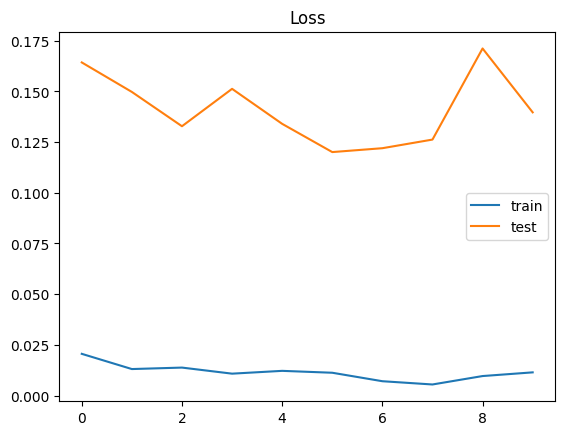

In [35]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

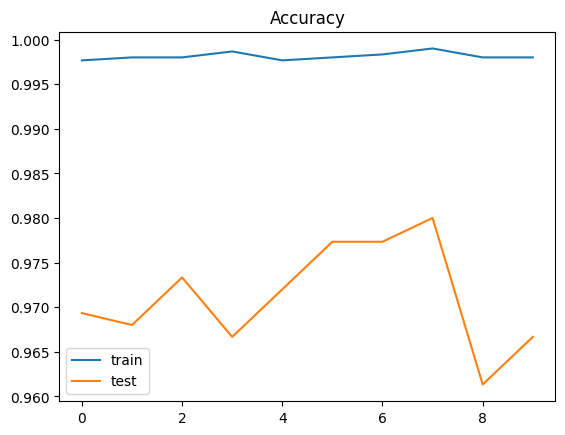

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()